In [17]:
import numpy as np
import matplotlib.pyplot as plt
import astropy.cosmology as Cosmology
from astropy import units as u 
from astropy import constants as const
from astropy.coordinates import SkyCoord
from ipynb.fs.full.Generator_trapz import *
from ipynb.fs.full.Dataframe_GOALS import *
from ipynb.fs.full.Xi import *

from astropy.coordinates import SkyCoord
import math
from IPython.display import display
import pandas as pd
import time

In [2]:
Ee= 1e3


Arp220_1 = Flux(Ee, 200, 500, 1000,150, 4.0, 1e8, 4.53,87.9)
Arp220_2 = Flux(Ee, 200, 500, 1000,150, 4.48, 1e8, 4.53,87.9)
Arp299_1 = Flux(Ee, 200, 500, 1000,150, 4.0, 1e8, 0.48,50.7)
Arp299_2 = Flux(Ee, 200, 500, 1000,150, 4.11, 1e8,0.48,50.7)
NGC2146_1 = Flux(Ee, 200, 500, 1000,150, 4.0, 1e8, 0.28,17.5)
NGC2146_2 = Flux(Ee, 200, 500, 1000,150, 4.27, 1e8, 0.28,17.5)
NGC1068_1 = Flux(Ee, 200, 500, 1000,150, 4.00, 1e8, 0.52,15.9)
NGC1068_2 = Flux(Ee, 200, 500, 1000,150, 4.52, 1e8 ,0.52,15.9)


In [37]:
Dec_all = df['Dec'].to_numpy('str')
RA_all = df['RA'].to_numpy('str')
c = [SkyCoord(i,j) for i,j in zip(RA_all,Dec_all)]

Text(0, 0.5, 'Counts')

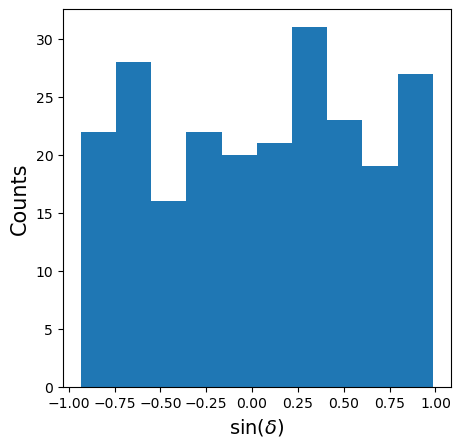

In [38]:
plt.figure(figsize=(5,5), dpi= 100, facecolor='w', edgecolor='k')
c_rad_sin_all = np.sin([i.dec.rad for i in c  ]) #radians
c_RA_all = [i.ra.deg for i in c  ] #degrees
plt.hist(c_rad_sin_all,10)
plt.xlabel('sin($\\delta$)', fontsize = 14)
plt.ylabel('Counts', fontsize = 15)

Text(0, 0.5, 'Counts')

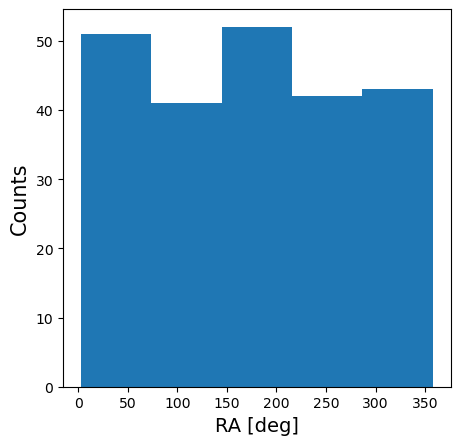

In [39]:
plt.figure(figsize=(5,5), dpi= 100, facecolor='w', edgecolor='k')
plt.hist(c_RA_all,5)
plt.xlabel('RA [deg]', fontsize = 14)
plt.ylabel('Counts', fontsize = 15)

In [27]:
df_irg=  df[(df['log(LIR)'] < 11)  ]
df_lirg = df[(df['log(LIR)']>= 11) & (df['log(LIR)'] < 12) ]
df_ulirg = df[(df['log(LIR)']>= 12)  ]


In [28]:
Dec_irg = df_irg['Dec'].to_numpy('str')
Dec_lirg = df_lirg['Dec'].to_numpy('str')
Dec_ulirg = df_ulirg['Dec'].to_numpy('str')

RA_irg = df_irg['RA'].to_numpy('str')
RA_lirg = df_lirg['RA'].to_numpy('str')
RA_ulirg = df_ulirg['RA'].to_numpy('str')

FTeV_irg = df_irg['Flux(TeV) [GeV cm$^{-2}$ s$^{-1}$]'].to_numpy('float')
FTeV_lirg = df_lirg['Flux(TeV) [GeV cm$^{-2}$ s$^{-1}$]'].to_numpy('float')
FTeV_ulirg = df_ulirg['Flux(TeV) [GeV cm$^{-2}$ s$^{-1}$]'].to_numpy('float')

c_irg = [SkyCoord(i,j) for i,j in zip(RA_irg,Dec_irg)]
c_lirg = [SkyCoord(i,j) for i,j in zip(RA_lirg,Dec_lirg)]
c_ulirg = [SkyCoord(i,j) for i,j in zip(RA_ulirg,Dec_ulirg)]

c_rad_sin_irg = np.sin([i.dec.rad for i in c_irg  ])
c_rad_sin_lirg = np.sin([i.dec.rad for i in c_lirg  ])
c_rad_sin_ulirg = np.sin([i.dec.rad for i in c_ulirg  ])

AGNfracs_irg = df_irg['AGNbol'].to_numpy()
AGNfracs_lirg = df_lirg['AGNbol'].to_numpy()
AGNfracs_ulirg = df_ulirg['AGNbol'].to_numpy()



N = df['Name'].to_numpy('str')

In [40]:
Sindec_IceCube_sens = np.loadtxt("sindec_10years")
Flux_IceCube_sens = np.loadtxt("Fluxsens_10years")
#Gen2 = np.loadtxt("RaDec_Gen2_sens")
#Sindec_IceCube2_sens = np.array([i[0] for i in Gen2])
#Flux_IceCube2_sens = np.array([i[1] for i in Gen2])

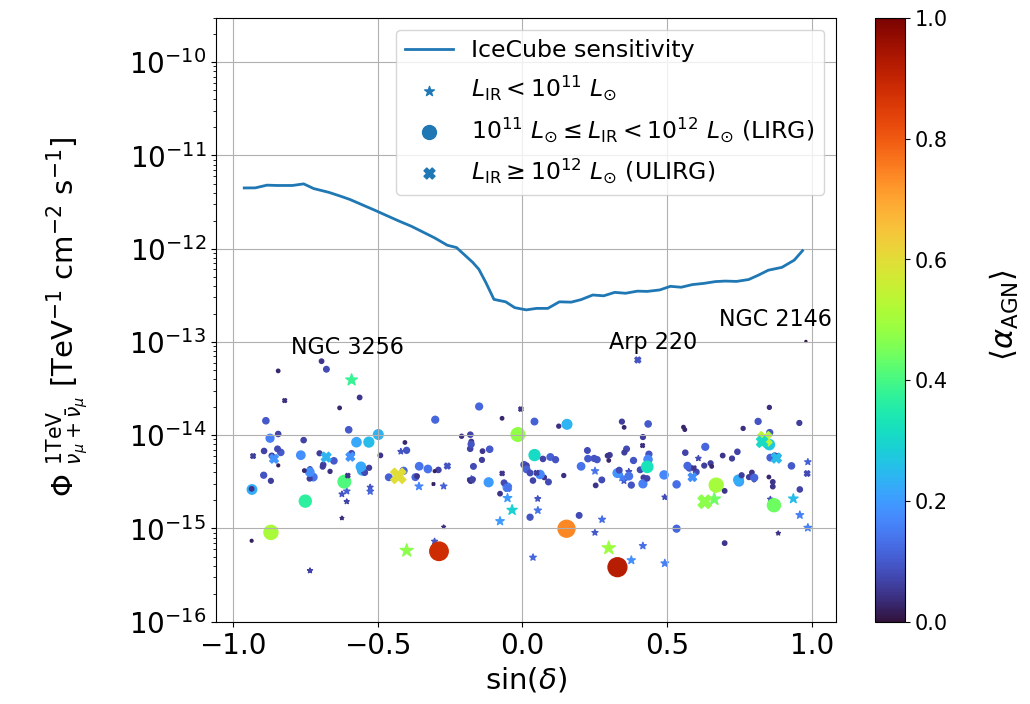

In [41]:
plt.figure(figsize=(10,8), dpi= 100, facecolor='w', edgecolor='k')


plt.grid()
plt.scatter(c_rad_sin_irg,FTeV_irg*(1e3/pow(1e3,2)),vmin=0,vmax=1,s = AGNfracs_irg*200 ,marker = '*', c = AGNfracs_irg,cmap = "turbo", label = '$ L_{\mathrm{IR}} < 10^{11}~L_{\odot}$')
plt.scatter(c_rad_sin_lirg,FTeV_lirg*(1e3/pow(1e3,2)),vmin=0,vmax=1 , s = AGNfracs_lirg*200 , marker = 'o',c = AGNfracs_lirg,cmap = "turbo", label = '$ 10^{11}~L_{\odot} \leq L_{\mathrm{IR}} < 10^{12}~L_{\odot}$ (LIRG)')
plt.scatter(c_rad_sin_ulirg,FTeV_ulirg*(1e3/pow(1e3,2)), vmin = 0, vmax = 1,s = AGNfracs_ulirg*200 ,marker='X',c = AGNfracs_ulirg,cmap = "turbo", label = '$L_{\mathrm{IR}} \geq 10^{12}~L_{\odot}$ (ULIRG)')
plt.text(0.30,8.5e-14, s= 'Arp 220',fontsize = 16)
plt.plot(Sindec_IceCube_sens,Flux_IceCube_sens, label = 'IceCube sensitivity',linewidth = 2)
plt.text(0.68, 1.5e-13, s= 'NGC 2146',fontsize = 16)
plt.text(-0.80,7.5e-14,s = 'NGC 3256',fontsize = 16)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=15) 


plt.ylim(1e-16,3e-10)
plt.yscale('log')
plt.xlabel('$\sin(\\delta$)',fontsize = 21)
plt.ylabel('\n $\\Phi~^{\mathrm{1TeV}}_{\\nu_\\mu + \\bar{\\nu}_\\mu}$ [TeV$^{-1}$ cm$^{-2}$ s$^{-1}$] \n', fontsize = 21)
plt.yticks(fontsize = 20)
plt.xticks([-1.00, -0.50 , 0.0, 0.50, 1.00 ],fontsize = 20)
cb.set_label(label = '\n $\\langle \\alpha_{\\mathrm{AGN}} \\rangle$',weight='bold', fontsize = 22)
plt.legend(fontsize = 17)
plt.savefig("/Users/yarno/Documents/PhD/Pictures/Fluxsindec.pdf",bbox_inches="tight")



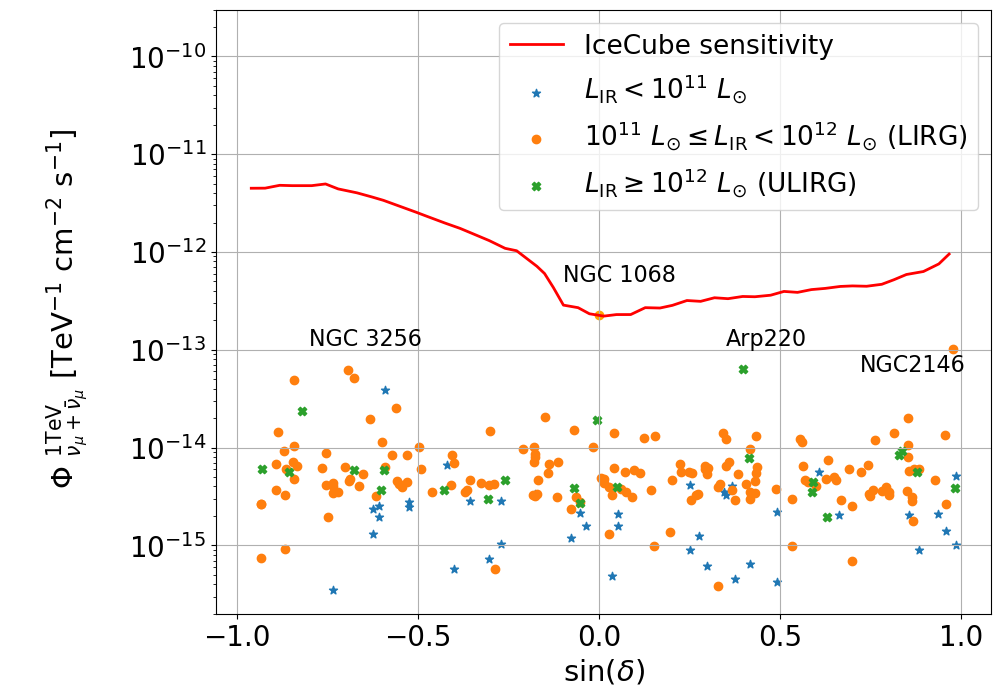

In [42]:
plt.figure(figsize=(10,8), dpi= 100, facecolor='w', edgecolor='k')

plt.grid()
plt.scatter(0, NGC1068_1*(1e3/pow(1e3,2)), marker= 'o',color = 'orange')
plt.text(-0.1,5e-13, s = 'NGC 1068', fontsize = 16)
plt.scatter(c_rad_sin_irg,FTeV_irg*(1e3/pow(1e3,2)),marker = '*', label = '$ L_{\mathrm{IR}} < 10^{11}~L_{\odot}$')
plt.scatter(c_rad_sin_lirg,FTeV_lirg*(1e3/pow(1e3,2)), marker = 'o', label = '$ 10^{11}~L_{\odot} \leq L_{\mathrm{IR}} < 10^{12}~L_{\odot}$ (LIRG)')
plt.scatter(c_rad_sin_ulirg,FTeV_ulirg*(1e3/pow(1e3,2)), marker = 'X', label = '$L_{\mathrm{IR}} \geq 10^{12}~L_{\odot}$ (ULIRG)')
plt.text(0.35, 1.1e-13, s= 'Arp220',fontsize = 16)
plt.plot(Sindec_IceCube_sens,Flux_IceCube_sens, label = 'IceCube sensitivity',linewidth = 2, color = 'red')
plt.text(0.72, 6e-14, s= 'NGC2146',fontsize = 16)
plt.text(-0.80,1.1e-13,s = 'NGC 3256',fontsize = 16)
cb.ax.tick_params(labelsize=15) 

plt.ylim(2e-16,3e-10)
plt.yscale('log')
plt.xlabel('$\sin(\\delta$)',fontsize = 21)
#plt.ylabel('\n $F_{\\nu_\\mu}$(1 $\mathrm{TeV}$)  [TeV$^{-1}$ cm$^{-2}$ s$^{-1}$] \n', fontsize = 21)
plt.ylabel('\n $\\Phi~^{\mathrm{1TeV}}_{\\nu_\\mu + \\bar{\\nu}_\\mu}$ [TeV$^{-1}$ cm$^{-2}$ s$^{-1}$] \n', fontsize = 21)

plt.yticks(fontsize = 20)
plt.xticks([-1.00, -0.50 , 0.0, 0.50, 1.00 ],fontsize = 20)
plt.legend(fontsize = 19)



In [32]:
for i in np.arange(0,1,0.01):
    ngc1068_flux = Flux(1e3, 200, 500, 1000,150, 4.0, 1e8, (1-i)*0.51,15.9)
    ngc2146_flux = Flux(1e3, 200, 500, 1000,150, 4.0, 1e8, 0.28,17.5)
    if ngc1068_flux < ngc2146_flux:
        print("For alpha_AGN = ", i, " NGC1068 shows the strongest neutrino flux")
        break
    

For alpha_AGN =  0.55  NGC1068 shows the strongest neutrino flux


In [33]:
Arp220_dec = 23.503139 #deg
Arp220_sindec = np.sin(np.deg2rad(Arp220_dec))
Arp299_dec = 58.561944 #deg
Arp299_sindec = np.sin(np.deg2rad(Arp299_dec))
NGC1068_dec = -0.013281 #deg
NGC1068_sindec = np.sin(np.deg2rad(NGC1068_dec))
NGC2146_dec = 78.357028 #deg
NGC2146_sindec = np.sin(np.deg2rad(NGC2146_dec))

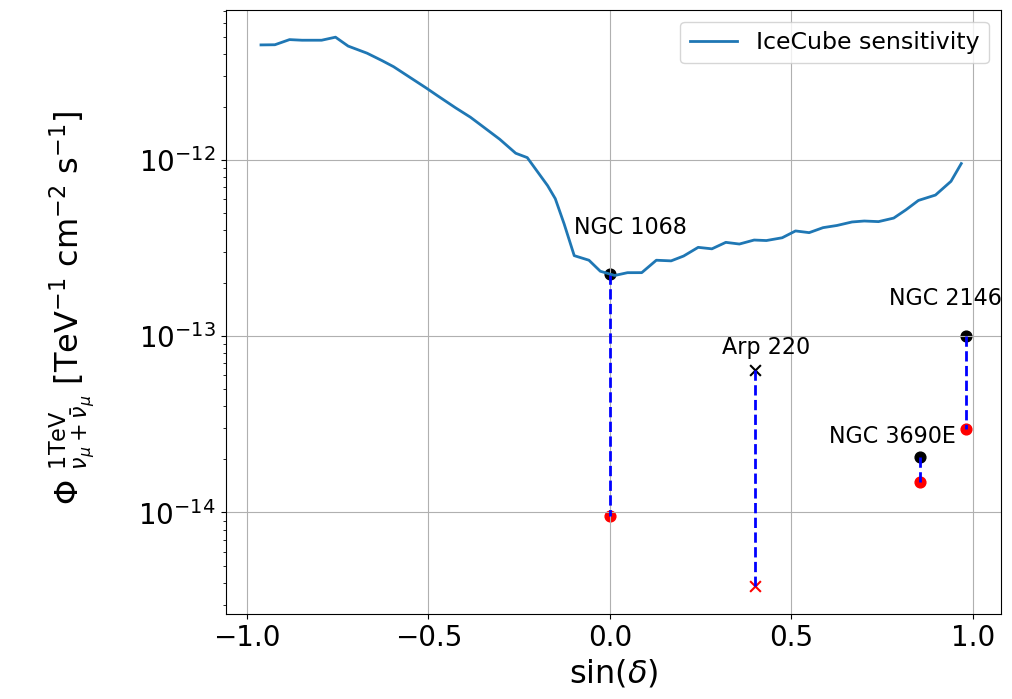

In [34]:
plt.figure(figsize=(10,8), dpi= 100, facecolor='w', edgecolor='k')

#f = InterpolatedUnivariateSpline(Sindec_IceCube_sens,Flux_IceCube_sens, k=1)

plt.scatter(Arp220_sindec, Arp220_1*(1e3/pow(1e3,2)), marker = 'x', c= 'k', s = 60)
plt.scatter(Arp220_sindec, Arp220_2*(1e3/pow(1e3,2)),marker = 'x', c= 'r',s = 60)
plt.vlines(Arp220_sindec, ymin = Arp220_1*(1e3/pow(1e3,2)), ymax= Arp220_2*(1e3/pow(1e3,2)),linestyle = '--',linewidth =2, color= 'blue')

plt.scatter(Arp299_sindec, Arp299_1*(1e3/pow(1e3,2)),marker = 'o', c= 'k', s= 60)
plt.scatter(Arp299_sindec, Arp299_2*(1e3/pow(1e3,2)),marker = 'o', c= 'r', s= 60)
plt.vlines(Arp299_sindec, ymin = Arp299_1*(1e3/pow(1e3,2)), ymax= Arp299_2*(1e3/pow(1e3,2)),linestyle = '--',linewidth =2, color= 'blue')


plt.scatter(NGC2146_sindec,NGC2146_1*(1e3/pow(1e3,2)), marker =  'o', c= 'k',s = 60)
plt.scatter(NGC2146_sindec,NGC2146_2*(1e3/pow(1e3,2)),marker = 'o', c= 'r', s= 60)
plt.vlines(NGC2146_sindec,ymin = NGC2146_1*(1e3/pow(1e3,2)), ymax = NGC2146_2*(1e3/pow(1e3,2)),linestyle = '--',linewidth =2, color= 'blue')


plt.scatter(NGC1068_sindec,NGC1068_1*(1e3/pow(1e3,2)),marker= 'o',c = 'k', s= 60)
plt.scatter(NGC1068_sindec,NGC1068_2*(1e3/pow(1e3,2)),marker= 'o',c = 'r', s= 60)
plt.vlines(NGC1068_sindec,ymin = NGC1068_1*(1e3/pow(1e3,2)), ymax = NGC1068_2*(1e3/pow(1e3,2)),linewidth =2, linestyle = '--',color= 'blue')


plt.grid()
plt.text(0.31, 8e-14, s= 'Arp 220',fontsize = 16)
plt.text(0.77, 1.5e-13, s= 'NGC 2146',fontsize = 16)
plt.text(-0.1, 3.8e-13, s= 'NGC 1068', fontsize = 16)
plt.text(Arp299_sindec-0.25, 2.5e-14, s= 'NGC 3690E',fontsize = 16)


plt.plot(Sindec_IceCube_sens,Flux_IceCube_sens, label = 'IceCube sensitivity',linewidth = 2)
#plt.plot(Sindec_IceCube2_sens,Flux_IceCube2_sens, label = 'IceCube-Gen2 sensitivity',linestyle = '--',linewidth = 2)


#plt.ylim(3e-15,7e-12)
plt.yscale('log')
plt.xlabel('$\sin(\\delta$)',fontsize = 23)
plt.ylabel('\n $\\Phi~^{\mathrm{1TeV}}_{\\nu_\\mu + \\bar{\\nu}_\\mu}$ [TeV$^{-1}$ cm$^{-2}$ s$^{-1}$] \n', fontsize = 23)
plt.yticks(fontsize = 20)
plt.xticks([-1.00, -0.50 , 0.0, 0.50, 1.00 ],fontsize = 20)
cb.set_label(label = '\n $\\langle \\alpha_{\\mathrm{AGN}} \\rangle$',weight='bold', fontsize = 20)
plt.legend(fontsize = 17)
plt.savefig("/Users/yarno/Documents/PhD/Pictures/Persource_variablegamma.pdf",bbox_inches="tight")




In [35]:
supernova_rate = df['Supernova rate [yr$^{-1}$] '].to_numpy('float')
uncorr_supernova_rate = df['un-corr Supernova rate [yr$^{-1}$] '].to_numpy('float')
luminosity_distance = df['D_L [Mpc]'].to_numpy('float')

In [36]:
def diffuse_flux_prediction(Erange,sn,lumd,gammasn):
    nism = 1000
    R = 250
    H = 150
    v = 500
    plow = 0.001
    pup = 1e9 
    pmax = 1e8
    diffuse_flux = 0
    diffuse_flux_array = []
    for k in Erange:
        for i,j in zip(sn,lumd):
            #diffuse_flux += bulk_flux(k,nism ,R,H, v, plow,pup, alpha,pmax , i, j  )[0]
            diffuse_flux += Flux(k, R,v,nism,H, gammasn, pmax , i, j )
        diffuse_flux_array += [diffuse_flux]    
        diffuse_flux = 0
    return np.array(diffuse_flux_array)/(4*np.pi)



In [18]:
Energy_range = np.logspace(np.log10(1.5e4),np.log10(5e6),12)
diffuse_flux_gamma5 = diffuse_flux_prediction(Energy_range, supernova_rate,luminosity_distance, 4.5)


In [19]:
diffuse_flux_gamma5_noAGN = diffuse_flux_prediction(Energy_range, uncorr_supernova_rate,luminosity_distance, 4.5)


In [20]:
diffuse_flux_gamma25 = diffuse_flux_prediction(Energy_range, supernova_rate, luminosity_distance, 4.25)


In [21]:
diffuse_flux_gamma25_noAGN = diffuse_flux_prediction(Energy_range, uncorr_supernova_rate,luminosity_distance, 4.25)

In [22]:
diffuse_flux_gamma2 = diffuse_flux_prediction(Energy_range,supernova_rate, luminosity_distance, 4)

In [23]:
diffuse_flux_gamma2_noAGN = diffuse_flux_prediction(Energy_range, uncorr_supernova_rate,luminosity_distance, 4)

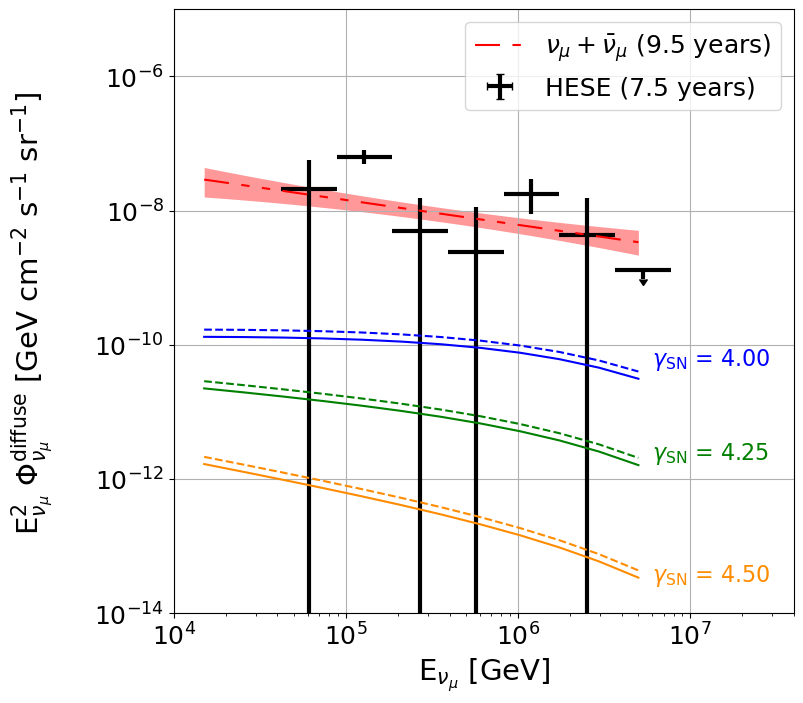

In [24]:
# Plot the HESE data up to index i
i = len(energy)
fig=plt.figure(figsize=(8,8), dpi= 100, facecolor='w', edgecolor='k')
Energy_plot = np.logspace(np.log10(1.5e4),np.log10(5e6),12)

plt.plot(Energy_plot,diffuse_flux_gamma2_noAGN,color = 'blue',linestyle = '--')
plt.plot(Energy_plot,diffuse_flux_gamma2,color = 'blue')

plt.plot(Energy_plot,diffuse_flux_gamma25_noAGN, color = 'green', linestyle = '--')
plt.plot(Energy_plot,diffuse_flux_gamma25, color = 'green')

plt.plot(Energy_plot,diffuse_flux_gamma5_noAGN, color = 'darkorange',linestyle= '--')
plt.plot(Energy_plot,diffuse_flux_gamma5, color = 'darkorange')




HESE = plt.errorbar(energy[:i],
                   flux[:i],
                   xerr=[energy_lower_err[:i],energy_upper_err[:i]],
                   yerr=[flux_lower_err[:i],flux_upper_err[:i]],
                   uplims=upper_limits[:i],
                   marker="o",
                   markersize=0,
                   color="k",
                   linestyle="none",
                   linewidth=3,
                   capsize=0, label = 'HESE (7.5 years)')

plt.text(6e6,5e-11, s = '$\\gamma_{\mathrm{SN}} $ = 4.00', fontsize = 16,color = 'blue')
plt.text(6e6,2e-12, s = '$\\gamma_{\mathrm{SN}} $ = 4.25', fontsize = 16,color = 'green')
plt.text(6e6,3e-14, s = '$\\gamma_{\mathrm{SN}} $ = 4.50', fontsize = 16,color = 'darkorange')

en = np.arange(1e4,5e6,100)

# Plot the diffuse nu_mu best fit
plt.xscale('log')
plt.yscale('log')
numu_best = plt.plot(energy_range_numu,
                    flux_numu*energy_range_numu**2,
                    color="r",
                    linestyle=(0,(12,6,4,6,4,6)), label= '$\\nu_\\mu + \\bar{\\nu}_{\\mu}$ (9.5 years)') # dashdotdotted

# Plot the error band of the diffuse nu_mu best fit



numu_err = plt.fill_between(energy_numu,
                           flux_lower,
                           flux_upper,
                           color="r",
                           lw=0,
                           alpha=0.4)


plt.ylim(1e-14,1e-5)
plt.xlim(1e4,4e7)
plt.xlabel ("E$_{\\nu_\\mu}$ [GeV]", fontsize = 21)
plt.ylabel('E$_{\\nu_{\\mu}}^2$ $\\Phi ^{\\mathrm{diffuse}}_{\\nu_\\mu}$ [GeV cm$^{-2}$ s$^{-1}$ sr$^{-1}$] \n', fontsize = 21)
plt.xticks(fontsize = 18)
plt.yticks(fontsize = 18)
plt.xscale('log')
plt.yscale('log')
plt.legend(fontsize = 18)
plt.grid()
plt.savefig("/Users/yarno/Documents/PhD/Pictures/diffuseGOALS.pdf",bbox_inches="tight")
